In [1]:
import folium
import pandas 
import numpy

In [2]:
la = pandas.read_csv("LA_CrimeData_2010-2019.csv")
la.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


Hypothesis Testing: In order to complete the hypothesis testing of our project, we first needed to come up with and create a null hypothesis. In order to do this, we wanted to compare two different columns: year and crime. We decided to compare and see whether or not the number of crimes committed is correlated to the year that the crime was comitted. Our null hypothesis was: there is no correlation between time (in years) and the number of crimes committed.

In [3]:
la['DATE']=(la['DATE OCC'].str.split().str[0])
la['DATE']

la['YEAR']=la['DATE'].str.split('/').str[2]
la['YEAR']=la['YEAR'].astype(int)





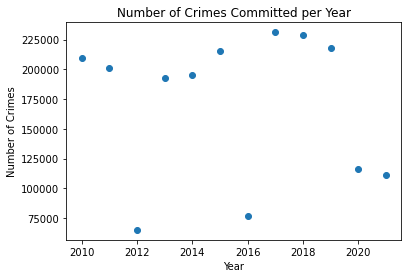

In [4]:
import matplotlib.pyplot as plt

x = la['YEAR'].value_counts().tolist()
y = la['YEAR'].value_counts().index.tolist()

s = x
t = y
import matplotlib.pyplot as plt
plt.scatter(y, x)
plt.title('Number of Crimes Committed per Year')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()



In order to analyze year vs. crime, we decided to create a visual to show the different years vs. the number of crimes that were committed in LA. The x-axis represents the year that the crime was committed and the y axis represents the number of crimes comitted in that year. Looking at the scatter plot, there seems to be a big range between the number of crimes committed over time. 

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Text(0, 0.5, 'Crimes')

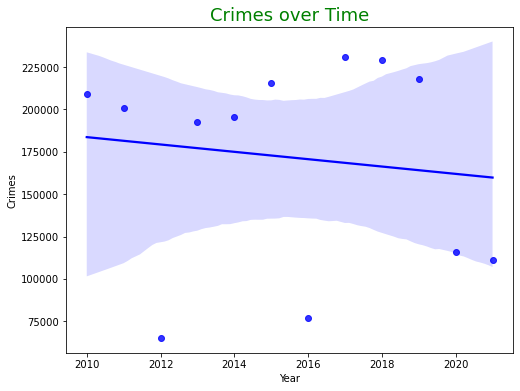

In [5]:
import seaborn as sns
from sklearn import linear_model
from statsmodels.formula.api import ols

df = pandas.DataFrame()

df['Crimes'] = s
df['Year'] = t


plt.figure(figsize = (8, 6))
sns.regplot(x = "Year", y = "Crimes", data = df, color = 'blue')
plt.title('Crimes over Time',color = 'green', fontsize = '18') 
plt.xlabel("Year")
plt.ylabel("Crimes")


This scatterplot represents the spread of the number of crimes per year from 2010 to 2019. After plotting our regression line, we did notice that there is a slight slant downwards. Although our points were scattered all over the place, it seems that the regression line does have a downwards slope. By looking at the points on our scatterplot themselves, there does not seem to be a general increase or decrease trend in the data. They seem to be all over the place each year going up or down or staying up/down. Next we decided to print out the regression summary to actually see what the slope and intercepts were.

In [6]:
regression = ols(formula = 'Crimes ~ Year', data = df).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 Crimes   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.1659
Date:                Mon, 16 May 2022   Prob (F-statistic):              0.692
Time:                        04:29:20   Log-Likelihood:                -148.68
No. Observations:                  12   AIC:                             301.4
Df Residuals:                      10   BIC:                             302.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.545e+06   1.07e+07      0.423      0.6

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
regression.params

Intercept    4.544930e+06
Year        -2.169776e+03
dtype: float64

After looking at the summary of the regression line, we can clearly tell that our slope is -2.167e+03. It is a negative number which means we have a decreasing slope for our regression line. Although it is decreasing, it is hard to tell from the points themselves. Our slope is also a very small number, hinting that there is not much of a change that occurs from year to year in regarding the number of crimes per year. 

In [ ]:
# Checking the p value for correlation

from scipy.stats import spearmanr
s, p_value = spearmanr(df.Crimes.values, df.Year.values) 
print('Statistic = %.4f, p = %.4f' % (s , p_value))
if p_value > 0.05:
    print('No correlation', p_value)
else:
    print('Correlated', p_value)


As we can see from the statistics above, we have a very large p value of 0.8122 which is 81.22%. In order to reject or accept the null hypothesis, we need look at how close it is to 0. The cutoff is 5% and our p value is well above that. Therefore, we will need to accept the null hypothesis which was that there is no correlation between year (time) and the number of crimes committed. We also printed it out and got the output "no correlation" which means that our null hypothesis was accepted. Therefore, we know that number of crimes that are reported in our data do not have any correlation with the year it is or as time goes up/down.
